### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

### Setup

In [4]:
cgi_csv = 'data/institutions_data_prepped.csv'

In [5]:
cgi_df = pd.read_csv(cgi_csv)

In [6]:
cgi_df.head()

,Name,Communities,CGI,Description,Institutional links,Metanotes,cgis_include_delegation,cgis_include_criticism_mocking_joking,cgis_include_assembly_elite,cgis_include_consent,cgis_include_council_central_,cgis_include_property_requirement,cgis_include_lottery_random_selection,cgis_include_magistrate_official,cgis_include_consultation,cgis_include_deliberation,cgis_include_unanimity,cgis_include_payment_for_occupying_office,cgis_include_scrutiny_of_officials,cgis_include_appeal,cgis_include_heredity,cgis_include_board_committee,cgis_include_representation,cgis_include_majority_voting,cgis_include_screening_process,cgis_include_reputational_risk,cgis_include_consensus,cgis_include_council_local,cgis_include_checks_and_balances,cgis_include_vote_by_proxy,cgis_include_supermajority,cgis_include_suspension_expulsion_ostracism_proscription,cgis_include_assembly_central,cgis_include_ratification_acclamation_only,cgis_include_remunerated_position,cgis_include_public_meetings,cgis_include_judicial_review,cgis_include_matrilineality,cgis_include_temporary_position_of_power_term_limits,cgis_include_life_appointment,cgis_include_co-optation,cgis_include_gerontocracy,cgis_include_meritocracy,cgis_include_vote_by_show_of_hands,cgis_include_secret_ballot,cgis_include_assembly_local,cgis_include_quorum,cgis_include_age_boundaries,cgis_include_turnover_rotation,cgis_include_matriarchy,cgis_include_oath,cgis_include_frequent_and_or_regular_meetings,cgis_include_election,cgis_include_blood_relations,cgis_include_litigation,cgis_include_tribunal_court_,cgis_include_voting,cgis_include_patronage_for_office,cgis_include_popularity_,cgis_include_agenda_setting
0,Hxaro,!Kung San (Ju/hoansi),NaN,System of mutual reciprocity partnerships\n\n'...,Inspiring principle of community life,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Headman,!Kung San (Ju/hoansi),NaN,"Headman. According to Lee, headmen become more...","leader of the community, heads the kgotla",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Group,!Kung San (Ju/hoansi),Deliberation,Decisions are made by the group and by discuss...,community,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kgotla,!Kung San (Ju/hoansi),NaN,Court\n\nLed by the headman. introduced upon c...,led by the headman,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Village Founder-Leader (dzoma),Akha,NaN,Person with the highest authority in the villa...,Council of Elders:\n-\tAlthough dzoma does arb...,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Note: CGI -> CGI *mechanisms*

In [7]:
cgi_only_df = cgi_df[cgi_df['CGI'].notna()]

In [8]:
cgi_only_df.head()

,Name,Communities,CGI,Description,Institutional links,Metanotes,cgis_include_delegation,cgis_include_criticism_mocking_joking,cgis_include_assembly_elite,cgis_include_consent,cgis_include_council_central_,cgis_include_property_requirement,cgis_include_lottery_random_selection,cgis_include_magistrate_official,cgis_include_consultation,cgis_include_deliberation,cgis_include_unanimity,cgis_include_payment_for_occupying_office,cgis_include_scrutiny_of_officials,cgis_include_appeal,cgis_include_heredity,cgis_include_board_committee,cgis_include_representation,cgis_include_majority_voting,cgis_include_screening_process,cgis_include_reputational_risk,cgis_include_consensus,cgis_include_council_local,cgis_include_checks_and_balances,cgis_include_vote_by_proxy,cgis_include_supermajority,cgis_include_suspension_expulsion_ostracism_proscription,cgis_include_assembly_central,cgis_include_ratification_acclamation_only,cgis_include_remunerated_position,cgis_include_public_meetings,cgis_include_judicial_review,cgis_include_matrilineality,cgis_include_temporary_position_of_power_term_limits,cgis_include_life_appointment,cgis_include_co-optation,cgis_include_gerontocracy,cgis_include_meritocracy,cgis_include_vote_by_show_of_hands,cgis_include_secret_ballot,cgis_include_assembly_local,cgis_include_quorum,cgis_include_age_boundaries,cgis_include_turnover_rotation,cgis_include_matriarchy,cgis_include_oath,cgis_include_frequent_and_or_regular_meetings,cgis_include_election,cgis_include_blood_relations,cgis_include_litigation,cgis_include_tribunal_court_,cgis_include_voting,cgis_include_patronage_for_office,cgis_include_popularity_,cgis_include_agenda_setting
2,Group,!Kung San (Ju/hoansi),Deliberation,Decisions are made by the group and by discuss...,community,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Council of Elders,Akha,"Council (central) ,Vote by proxy,Representatio...",A council with the highest power in the villag...,"Council of Elders discuss issues, and their co...",NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Sedile di congrega,Amalfi,"Council (central) ,Deliberation","Elite council\n\nCamera, M. p. 238 (""Un sedile...",Not specified,NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,Comizi,Amalfi,"Assembly (central),Public meetings,Consent,Rat...","Popular assembly\n\nM. p 89 (""Noi però colla s...",Elects the Prefetturii/ Conti/ Dogi,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,Sabhā,Indian Republics,Council (central),Council of elders or of the important men of t...,it depends on whether the community is type 1-4,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
cgi_mechanisms_list = [x for x in cgi_only_df.columns if x.startswith('cgis_include_')]
cgi_mechanisms_list

['cgis_include_delegation',
 'cgis_include_criticism_mocking_joking',
 'cgis_include_assembly_elite',
 'cgis_include_consent',
 'cgis_include_council_central_',
 'cgis_include_property_requirement',
 'cgis_include_lottery_random_selection',
 'cgis_include_magistrate_official',
 'cgis_include_consultation',
 'cgis_include_deliberation',
 'cgis_include_unanimity',
 'cgis_include_payment_for_occupying_office',
 'cgis_include_scrutiny_of_officials',
 'cgis_include_appeal',
 'cgis_include_heredity',
 'cgis_include_board_committee',
 'cgis_include_representation',
 'cgis_include_majority_voting',
 'cgis_include_screening_process',
 'cgis_include_reputational_risk',
 'cgis_include_consensus',
 'cgis_include_council_local',
 'cgis_include_checks_and_balances',
 'cgis_include_vote_by_proxy',
 'cgis_include_supermajority',
 'cgis_include_suspension_expulsion_ostracism_proscription',
 'cgis_include_assembly_central',
 'cgis_include_ratification_acclamation_only',
 'cgis_include_remunerated_positi

In [10]:
cgi_mechanisms_df = cgi_only_df[cgi_mechanisms_list]

In [11]:
cgi_mechanisms_df

,cgis_include_delegation,cgis_include_criticism_mocking_joking,cgis_include_assembly_elite,cgis_include_consent,cgis_include_council_central_,cgis_include_property_requirement,cgis_include_lottery_random_selection,cgis_include_magistrate_official,cgis_include_consultation,cgis_include_deliberation,cgis_include_unanimity,cgis_include_payment_for_occupying_office,cgis_include_scrutiny_of_officials,cgis_include_appeal,cgis_include_heredity,cgis_include_board_committee,cgis_include_representation,cgis_include_majority_voting,cgis_include_screening_process,cgis_include_reputational_risk,cgis_include_consensus,cgis_include_council_local,cgis_include_checks_and_balances,cgis_include_vote_by_proxy,cgis_include_supermajority,cgis_include_suspension_expulsion_ostracism_proscription,cgis_include_assembly_central,cgis_include_ratification_acclamation_only,cgis_include_remunerated_position,cgis_include_public_meetings,cgis_include_judicial_review,cgis_include_matrilineality,cgis_include_temporary_position_of_power_term_limits,cgis_include_life_appointment,cgis_include_co-optation,cgis_include_gerontocracy,cgis_include_meritocracy,cgis_include_vote_by_show_of_hands,cgis_include_secret_ballot,cgis_include_assembly_local,cgis_include_quorum,cgis_include_age_boundaries,cgis_include_turnover_rotation,cgis_include_matriarchy,cgis_include_oath,cgis_include_frequent_and_or_regular_meetings,cgis_include_election,cgis_include_blood_relations,cgis_include_litigation,cgis_include_tribunal_court_,cgis_include_voting,cgis_include_patronage_for_office,cgis_include_popularity_,cgis_include_agenda_setting
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
cgi_mechanisms_df.sum().sort_values(ascending=False)

cgis_include_council_central_                               41
cgis_include_assembly_central                               29
cgis_include_council_local                                  25
cgis_include_frequent_and_or_regular_meetings               16
cgis_include_tribunal_court_                                15
cgis_include_consensus                                      14
cgis_include_election                                       14
cgis_include_deliberation                                   14
cgis_include_assembly_local                                 13
cgis_include_representation                                 13
cgis_include_majority_voting                                 9
cgis_include_temporary_position_of_power_term_limits         8
cgis_include_assembly_elite                                  8
cgis_include_public_meetings                                 8
cgis_include_turnover_rotation                               6
cgis_include_consultation                              

<Axes: >

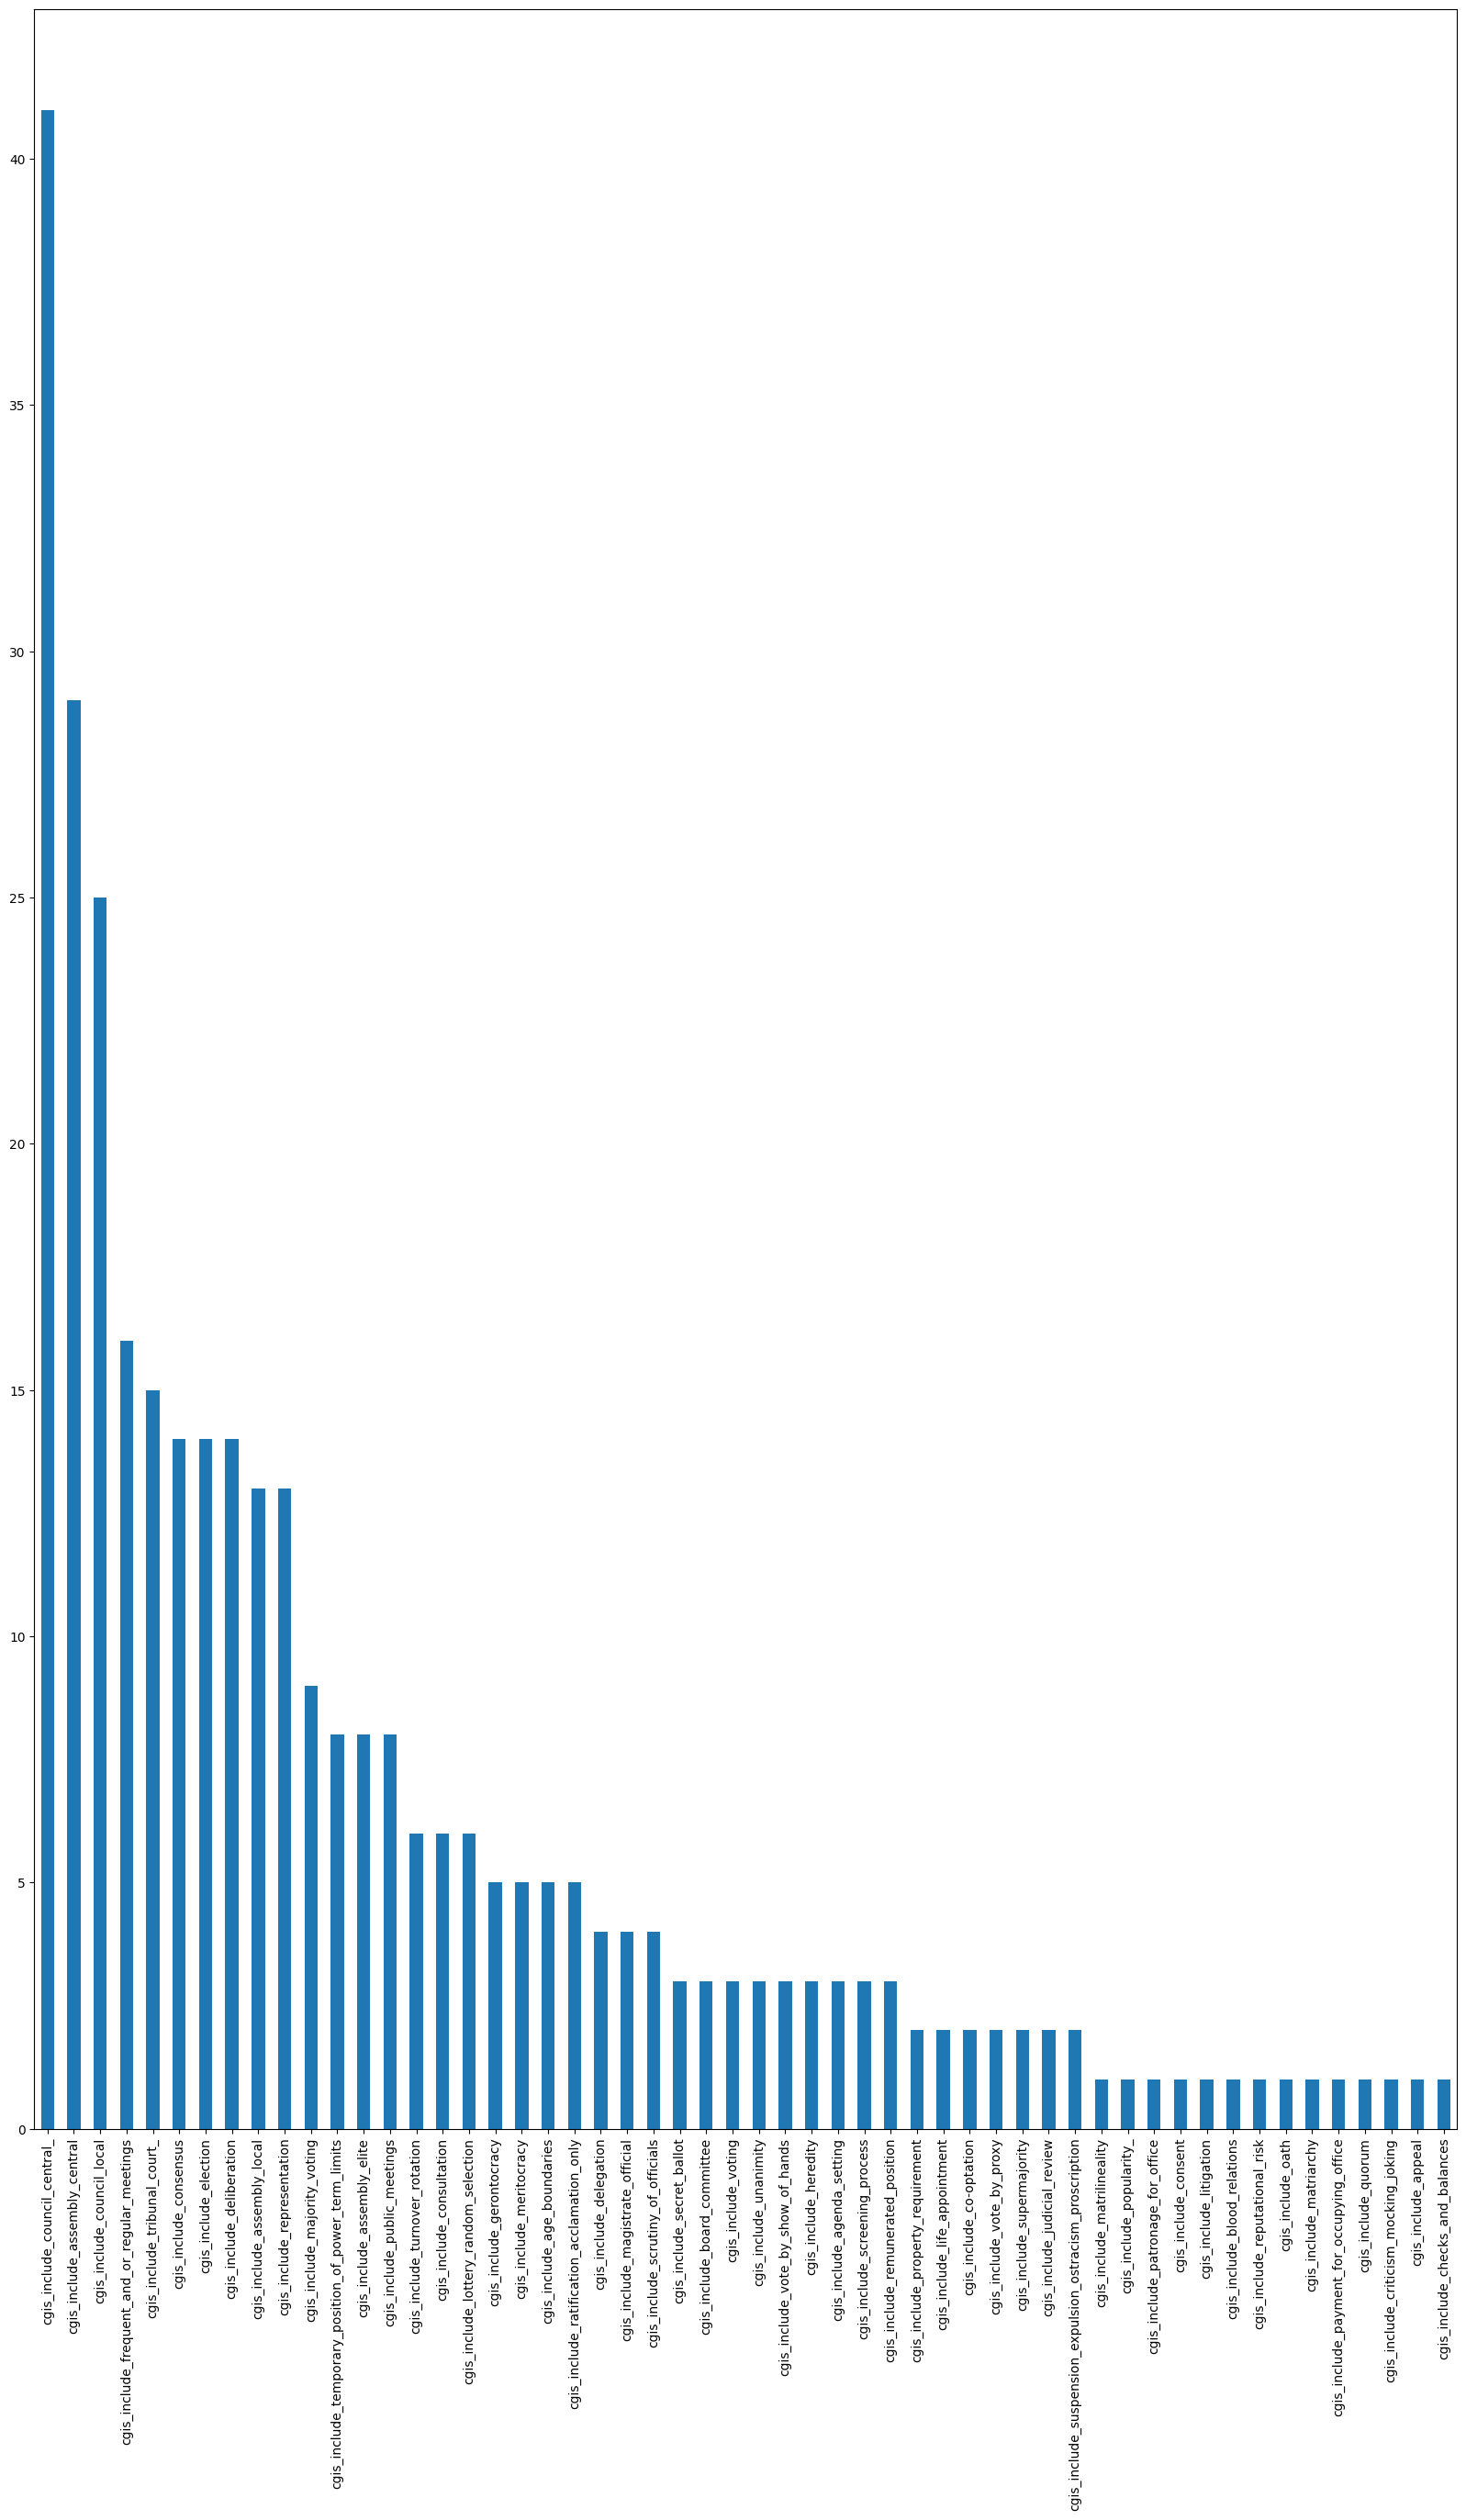

In [13]:
cgi_mechanisms_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

TODO: 
  - comparative analysis b/n CGI mechanisms and non-CGI mechanisms